In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.animation

In [2]:
import nibabel as nib

In [3]:
img = nib.load('fmri/fmri_X_1038415_session_1_run1.nii.gz')

In [4]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  53  64  46 231   1   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 3. 3. 3. 2. 1. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'mnc2nii /media/database2/adhd_niak/peking_test_output//fmri//fmri_X_1038415_ses'
aux_file        : b''
qform_code      : unknown
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 

In [5]:
img.affine

array([[   3.,    0.,    0.,  -78.],
       [   0.,    3.,    0., -112.],
       [   0.,    0.,    3.,  -50.],
       [   0.,    0.,    0.,    1.]])

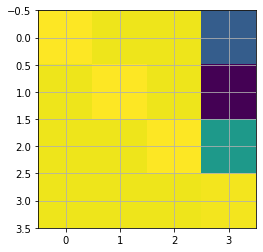

In [6]:
plt.imshow(img.affine)
plt.grid()

In [7]:
epi_img_data = img.get_fdata()

In [8]:
epi_img_data.shape

(53, 64, 46, 231)

Text(0.5, 0.98, 'Slices at fixed time zero')

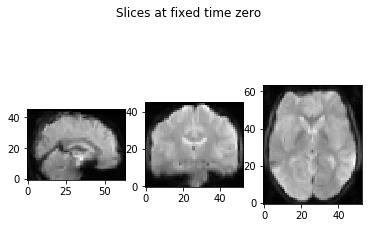

In [9]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = epi_img_data[26, :, :, 0]
slice_1 = epi_img_data[:, 30, :, 0]
slice_2 = epi_img_data[:, :, 16, 0]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Slices at fixed time zero")

In [10]:
pos = 30
axes = 0
def animate(i):
    if(axes == 0):
        ax.imshow(epi_img_data[pos, :, :, i])
    elif(axes == 1):
        ax.imshow(epi_img_data[:, pos, :, i])
    else:
        ax.imshow(epi_img_data[:, :, pos, i])

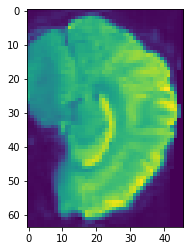

In [11]:
fig, ax = plt.subplots()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=53)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [12]:
from utilities import averaging_slide, variance_to_average, variance

In [13]:
average_im = averaging_slide(epi_img_data)

Text(0.5, 0.98, 'Arithmetic Mean')

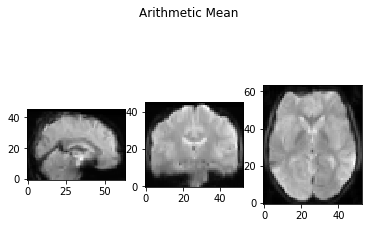

In [14]:
slice_0 = average_im[26, :, :]
slice_1 = average_im[:, 30, :]
slice_2 = average_im[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Arithmetic Mean")

In [15]:
pd_matrix = variance_to_average(epi_img_data,average_im)

In [16]:
pd_matrix.shape

(53, 64, 46, 231)

Text(0.5, 0.98, 'Pixel-Wise Difference')

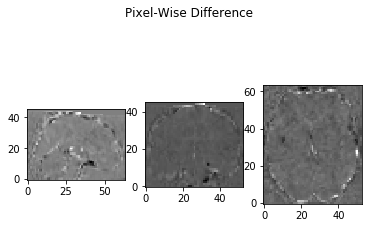

In [17]:
slice_0 = pd_matrix[26, :, :,0]
slice_1 = pd_matrix[:, 30, :,0]
slice_2 = pd_matrix[:, :, 16,0]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Pixel-Wise Difference")

In [18]:
variance_matrix = variance(epi_img_data)

Text(0.5, 0.98, 'Variance')

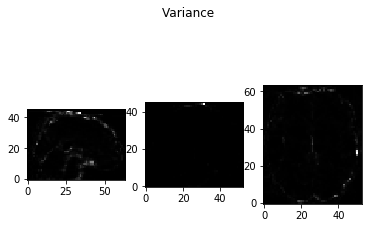

In [19]:
slice_0 = variance_matrix[26, :, :]
slice_1 = variance_matrix[:, 30, :]
slice_2 = variance_matrix[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Variance")